In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

## Derivada tipo Euler
$$
f'_i = \frac{f_{i+1}-f_i}{x_{i+1}-x_i}
$$
El último punto se puede calcular como:
$$
f'_N = \frac{f_{N}-f_{N-1}}{x_{N}-x_{N-1}}
$$

In [27]:
def deriv_Euler(f,x):
    h , df = x[1] - x[0] , np.zeros_like(f)
    for i in range(len(f)-1):
        df[i] = f[i+1] - f[i]
    df[-1] = f[-1] - f[-2]
    return df/h

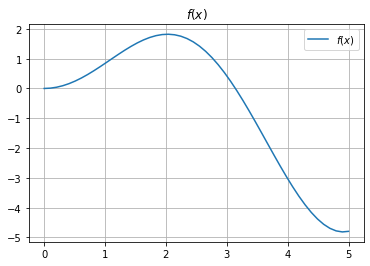

In [28]:
x = np.linspace(0,5)
y = x*np.sin(x)
plt.title(r"$f(x)$")
plt.plot(x,y,label=r"$f(x)$")
plt.grid(),plt.legend(),
plt.show()

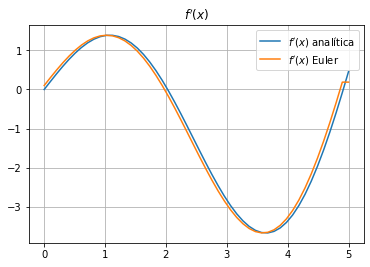

In [29]:
dy = np.sin(x) + x*np.cos(x)
dy_euler = deriv_Euler(y,x)
plt.title(r"$f'(x)$")
plt.plot(x,dy,label=r"$f'(x)$ analítica")
plt.plot(x,dy_euler,label=r"$f'(x)$ Euler")
plt.grid(),plt.legend(),
plt.show()

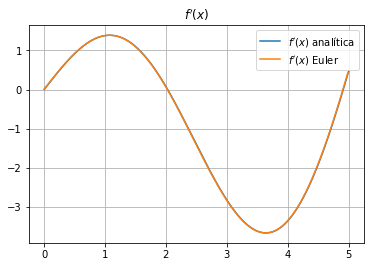

In [36]:
# Con mas puntos
x = np.linspace(0,5,500)
y = x*np.sin(x)
dy = np.sin(x) + x*np.cos(x)
dy_euler = deriv_Euler(y,x)
plt.title(r"$f'(x)$")
plt.plot(x,dy,label=r"$f'(x)$ analítica")
plt.plot(x,dy_euler,label=r"$f'(x)$ Euler")
plt.grid(),plt.legend(),
plt.show()

## Derivada simétrica

$$
f'_i= \frac{f_{i+1}-f_{i-1}}{x_{i+1}-x_{i-1}}
$$

El último punto se puede calcular como:

$$
f'_0 = \frac{1}{x_{1}-x_{0}} \left( -\frac{1}{2}f_{2} + 2f_{1} -\frac{3}{2}f_0 \right)
$$

$$
f'_N = - \frac{1}{x_{N}-x_{N-1}} \left( -\frac{1}{2}f_{N-2} + 2f_{N-1} -\frac{3}{2}f_N \right)
$$

In [60]:
def deriv_h2(f,x):
    h2 , df = x[2] - x[0] , np.zeros_like(f)
    for i in range(1,len(f)-1):
        df[i] = f[i+1] - f[i-1]
    df[0] = -f[2] + 4.0*f[1] - 3.0*f[0]
    df[-1] = f[-3] - 4.0*f[-2] + 3.0*f[-1]
    return df/h2

def deriv_h2_chavo(f,x):
    h , df = x[1] - x[0] , np.zeros_like(f)
    for i in range(1,len(f)-1):
        df[i] = ( f[i+1] - f[i-1] ) / (2*h)
    df[0] = (-f[2]/2 + 2*f[1] - 1.5*f[0] ) /h
    df[-1] = (f[-3]/2 - 2*f[-2] + 1.5*f[-1] )/h
    return df

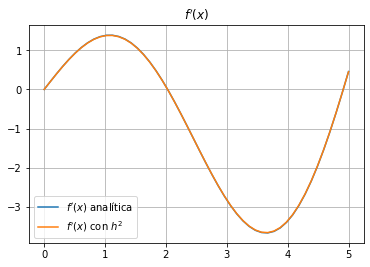

In [58]:
x = np.linspace(0,5,50)
y = x*np.sin(x)
dy = np.sin(x) + x*np.cos(x)
dy_h2 = deriv_h2(y,x)
plt.title(r"$f'(x)$")
plt.plot(x,dy,label=r"$f'(x)$ analítica")
plt.plot(x,dy_h2,label=r"$f'(x)$ con $h^2$")
plt.grid(),plt.legend(),
plt.show()

In [61]:
x = np.linspace(0,5,50)
y = x*np.sin(x)

In [62]:
%%timeit
dy_h2 = deriv_h2(y,x)

10.4 µs ± 278 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [63]:
%%timeit
dy_h2 = deriv_h2_chavo(y,x)

15.8 µs ± 120 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [64]:
15.8/10.4

1.5192307692307692

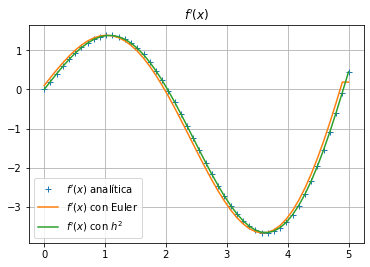

In [67]:
x = np.linspace(0,5,50)
y = x*np.sin(x)
dy = np.sin(x) + x*np.cos(x)
dy_euler = deriv_Euler(y,x)
dy_h2 = deriv_h2(y,x)
plt.title(r"$f'(x)$")
plt.plot(x,dy,'+',label=r"$f'(x)$ analítica")
plt.plot(x,dy_euler,label=r"$f'(x)$ con Euler")
plt.plot(x,dy_h2,label=r"$f'(x)$ con $h^2$")
plt.grid(),plt.legend(),
plt.show()

Max err Euler: 0.2707783227165114
Max err h2: 0.008483881906918178


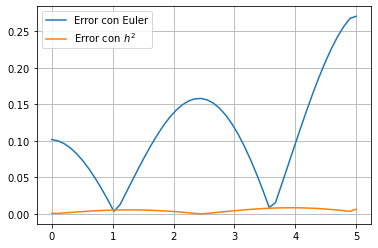

In [71]:
error_euler = abs(dy-dy_euler)
error_h2 = abs(dy-dy_h2)
print('Max err Euler:', error_euler.max())
print('Max err h2:',max(error_h2))
plt.plot(x,error_euler,label='Error con Euler')
plt.plot(x,error_h2,label='Error con $h^2$')
plt.grid(),plt.legend()
plt.show()

In [72]:
%%timeit
deriv_Euler(y,x)

9.79 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [73]:
%%timeit
deriv_h2(y,x)

10.5 µs ± 47.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [76]:
x = np.linspace(0,5,2000)
y = x*np.sin(x)
dy = np.sin(x) + x*np.cos(x)
dy_euler = deriv_Euler(y,x)
error_euler = abs(dy-dy_euler)
print('Max err Euler:', error_euler.max())

Max err Euler: 0.006704260456354472


In [77]:
%%timeit
deriv_Euler(y,x)

298 µs ± 3.27 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Derivativas con $h^2$
$$
f'_i = \frac{1}{12h} ( -f_{i+2} +8f_{i+1} - 8f_{i-1}  +f_{i-2} )
$$
Punto inicial con $i=0,1$
$$
f'_i = \frac{1}{12h} \left( -25 f_i + 48f_{i+1} - 36f_{i+2} +16 f_{i+3} -3f_{i+4} \right)
$$

In [84]:
def deriv_h4(f,x):
    h_12 , df = 12*(x[1]-x[0]) , np.zeros_like(f)
    for i in range(2,len(f)-2):
        df[i] = - f[i+2] + 8.0*f[i+1] - 8.0*f[i-1] + f[i-2]
    df[0] = -25.0*f[0] +48.0*f[1] -36*f[2] +16*f[3] -3*f[4]
    df[1] = -25.0*f[1] +48.0*f[2] -36*f[3] +16*f[4] -3*f[5]
    df[-1] = 25.0*f[-1] -48.0*f[-2] +36*f[-3] -16*f[-4] +3*f[-5]
    df[-2] = 25.0*f[-2] -48.0*f[-3] +36*f[-4] -16*f[-5] +3*f[-6]
    return df/h_12

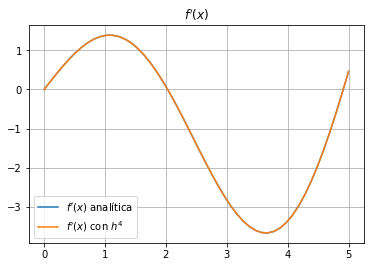

In [85]:
x = np.linspace(0,5,50)
y = x*np.sin(x)
dy = np.sin(x) + x*np.cos(x)
dy_h4 = deriv_h4(y,x)
plt.title(r"$f'(x)$")
plt.plot(x,dy,label=r"$f'(x)$ analítica")
plt.plot(x,dy_h4,label=r"$f'(x)$ con $h^4$")
plt.grid(),plt.legend(),
plt.show()

In [86]:
%%timeit
deriv_h4(y,x)

23.6 µs ± 237 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [87]:
error_h4 = abs(dy-dy_h4)
print('Error con h4: ' , error_h4.max() )

Error con h4:  0.00010656580837752061


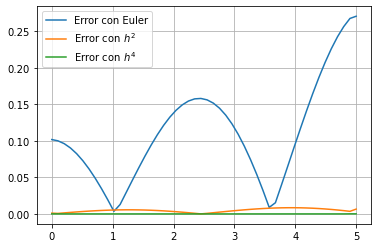

In [89]:
x = np.linspace(0,5,50)
y = x*np.sin(x)
dy = np.sin(x) + x*np.cos(x)
dy_euler = deriv_Euler(y,x)
dy_h2 = deriv_h2(y,x)
dy_h4 = deriv_h4(y,x)
error_euler = abs(dy-dy_euler)
error_h2 = abs(dy-dy_h2)
error_h4 = abs(dy-dy_h4)
plt.plot(x,error_euler,label='Error con Euler')
plt.plot(x,error_h2,label='Error con $h^2$')
plt.plot(x,error_h4,label='Error con $h^4$')
plt.grid(),plt.legend()
plt.show()

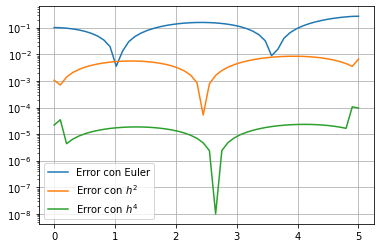

In [90]:
plt.semilogy(x,error_euler,label='Error con Euler')
plt.semilogy(x,error_h2,label='Error con $h^2$')
plt.semilogy(x,error_h4,label='Error con $h^4$')
plt.grid(),plt.legend()
plt.show()